# **Análisis de datos**
## **Tarea 14**
### **Análisis de datos**

------------------------------

Importamos librerías. 

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import pandas as pd

Cargamos los datos de ls_dr7.tractor_primary.

In [72]:
file = pd.read_csv('result.txt')

In [73]:
file

,allmask_g,allmask_r,allmask_z,anymask_g,anymask_r,anymask_z,brickid,brickname,brick_primary,brightstarinblob,...,snr_w4,snr_z,type,w1_w2,w2_w3,w3_w4,wise_coadd_id,wisemask_w1,wisemask_w2,z_w1
0,0,0,1024,0,0,1024,247637,3474m147,1,0,...,-0.920938,2.732010,REX,NaN,NaN,NaN,3474m152,0,0,NaN
1,0,0,1040,0,0,1040,247637,3474m147,1,0,...,-0.490249,3.364090,DEV,-0.470787,NaN,NaN,3474m152,0,0,-2.93932
2,0,0,0,0,0,0,247637,3474m147,1,0,...,-1.592120,0.000000,PSF,0.241451,1.05883,NaN,3474m152,0,0,Infinity
3,0,0,0,0,0,0,247637,3474m147,1,0,...,2.334080,0.099626,REX,NaN,NaN,NaN,3474m152,0,0,NaN
4,0,0,0,0,0,0,247637,3474m147,1,0,...,-0.443290,35.183100,EXP,-0.575882,1.98632,NaN,3474m152,0,0,-0.468863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,247637,3474m147,1,0,...,-4.539360,3.622270,PSF,NaN,NaN,NaN,3474m152,0,0,NaN
4996,0,0,0,0,0,0,247637,3474m147,1,0,...,1.039730,1.290480,REX,NaN,NaN,3.41771,3474m152,0,0,NaN
4997,0,0,0,16,0,0,247637,3474m147,1,0,...,0.826373,0.977402,REX,NaN,NaN,1.45360,3474m152,0,0,NaN
4998,0,0,0,0,0,0,247637,3474m147,1,0,...,-2.542900,2.173770,PSF,NaN,NaN,NaN,3474m152,0,0,NaN


Vemos qué columnas tiene este data frame. 

In [74]:
file.keys()

Index(['allmask_g', 'allmask_r', 'allmask_z', 'anymask_g', 'anymask_r',
       'anymask_z', 'brickid', 'brickname', 'brick_primary',
       'brightstarinblob',
       ...
       'snr_w4', 'snr_z', 'type', 'w1_w2', 'w2_w3', 'w3_w4', 'wise_coadd_id',
       'wisemask_w1', 'wisemask_w2', 'z_w1'],
      dtype='object', length=182)

**Vemos qué datos no duplicados tiene la columna 'type'.**

In [76]:
file['type'].drop_duplicates()

0      REX
1      DEV
2      PSF
4      EXP
45    COMP
Name: type, dtype: object

**Lo mismo se puede hacer utilizando el siguiente comando:**

In [84]:
tipos = file['type'].unique()
tipos

array(['REX', 'DEV', 'PSF', 'EXP', 'COMP'], dtype=object)

-------------------------------------------

**Buscamos graficar la columna 'dec' contra 'ra' donde se incluya una barra de colores en donde podamos observar si se trata de una estrella, una galaxia, etc.**

**ra : Right ascension at epoch J2000**
**dec: Declination at epoch J2000**

In [71]:
rex = file['type'][file['type']=='REX']
rex

0       REX
3       REX
5       REX
7       REX
9       REX
       ... 
4989    REX
4990    REX
4996    REX
4997    REX
4999    REX
Name: type, Length: 2053, dtype: object

**Finalmente, hacemos la gráfica:**

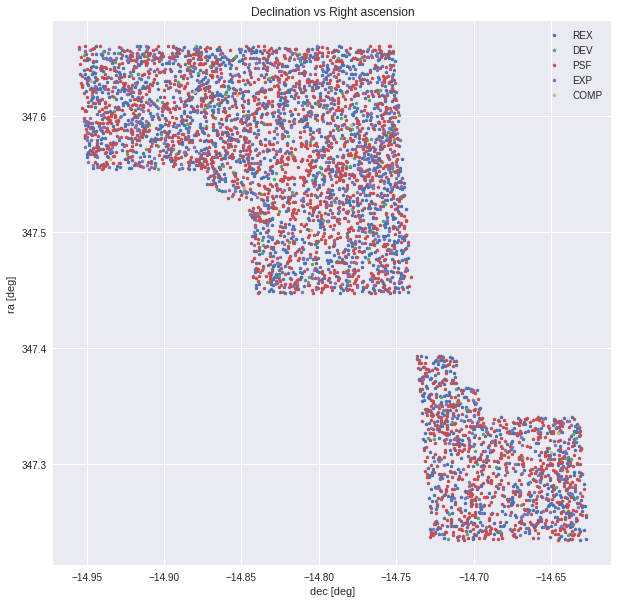

In [183]:
plt.figure(figsize = (10,10)) # Figura grande
plt.style.use('seaborn')

for m in tipos: #Ciclo for para graficar por color la columna type
    plt.plot(file['dec'][file['type'] == m], file['ra'][file['type'] == m], 'p', markersize = 4,label = m)
    
plt.legend()
plt.xlabel('dec [deg]')
plt.ylabel('ra [deg]')
plt.title('Declination vs Right ascension');
#plt.plot(file['dec'][file['type'] == 'REX'], file['ra'][file['type'] == 'REX'], '.')
#plt.plot(file['dec'][file['type'] == 'DEV'], file['ra'][file['type'] == 'DEV'], '.')
#plt.scatter(file['dec'], file['ra'], label=None,c=file['type'], cmap='viridis', linewidth=0, alpha=0.5)

---------------------------------------

**La siguiente gráfica será: Magnitud en r vs Magnitud en g, nuevamente haciendo una identificación por color para el tipo.**

Eliminamos renglones de file que tengan datos tipo 'nan',

In [262]:
notNAN = file

In [263]:
notNAN = file.dropna(subset=['mag_r', 'mag_g']) # Drop nan type

**Convertimos la columna de mag_r a tipo float. Al parecer esta columna se descargó como tipo string.**

In [264]:
notNAN['mag_r'] = notNAN['mag_r'].astype(float) # Convert from string to float

/home/anita/.conda/envs/data_main/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


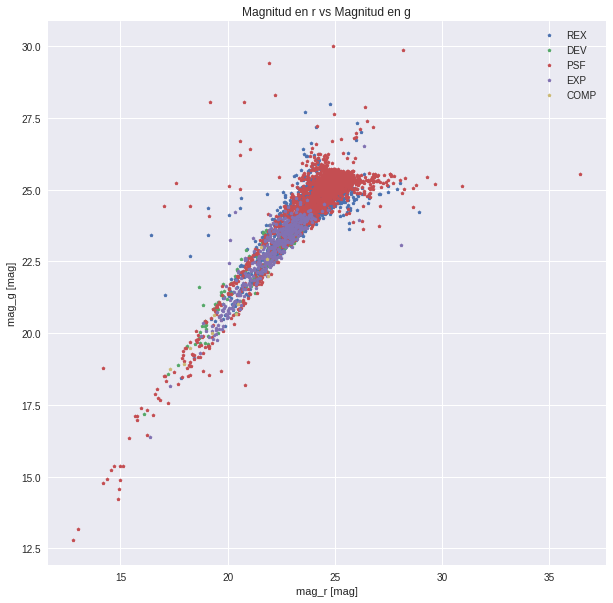

In [265]:
plt.figure(figsize = (10,10))

for m in tipos: # Ciclo for para graficar por color la columna type
    plt.plot(notNAN['mag_r'][notNAN['type'] == m], notNAN['mag_g'][notNAN['type'] == m], 'p', markersize = 4,label = m)
    
plt.legend()
plt.xlabel('mag_r [mag]')
plt.ylabel('mag_g [mag]')
plt.title('Magnitud en r vs Magnitud en g');

**Podemos hacer lo mismo para otras magnitudes en banda.**

In [266]:
notNAN = file

In [267]:
notNAN = file.dropna(subset=['mag_g']) # Drop nan type
notNAN = notNAN.dropna(subset=['mag_z'])

In [268]:
notNAN['mag_z'] = notNAN['mag_z'].astype(float) # Convert to float

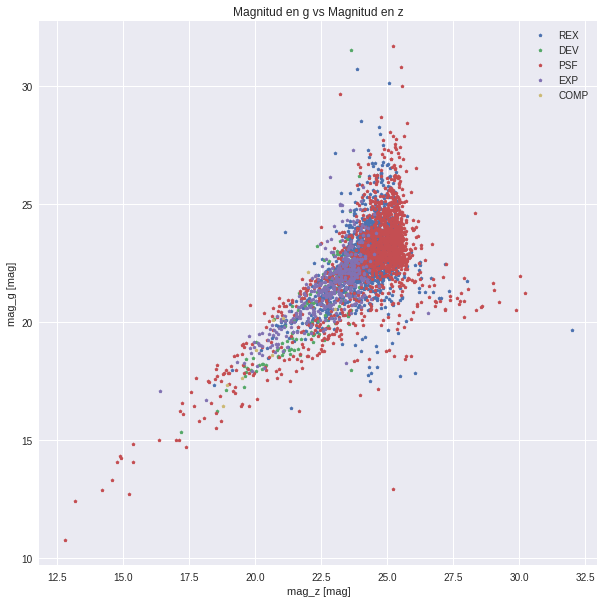

In [269]:
plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para plotear por color.
    plt.plot(notNAN['mag_g'][notNAN['type'] == m], notNAN['mag_z'][notNAN['type'] == m], 'p', markersize = 4,label = m)
    
plt.legend()
plt.xlabel('mag_z [mag]')
plt.ylabel('mag_g [mag]')
plt.title('Magnitud en g vs Magnitud en z');

Y podemos observar que tiene una forma parecida a magnitud en r contra magnitud en g. 

**Ahora entre mag_w1 y mag_w2.**

In [270]:
notNAN = file

In [271]:
notNAN = file.dropna(subset=['mag_w1']) # Drop nan type
notNAN = notNAN.dropna(subset=['mag_w2'])

In [272]:
notNAN['w2'] = notNAN['mag_w2'].astype(float) # Convert to float

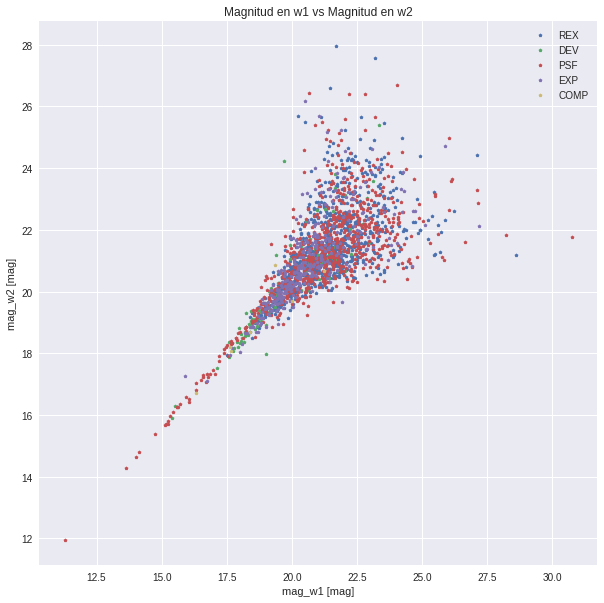

In [273]:
plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para graficar por color
    plt.plot(notNAN['mag_w1'][notNAN['type'] == m], notNAN['mag_w2'][notNAN['type'] == m], 'p', markersize = 4,label = m)
    
plt.legend()
plt.xlabel('mag_w1 [mag]')
plt.ylabel('mag_w2 [mag]')
plt.title('Magnitud en w1 vs Magnitud en w2');

--------------------------------

**La siguiente gráfica es de mag_r vs shapeexp_r**

**mag_r = Converted R magnitud. shapeexp_r = half light radius exponential model**

In [274]:
notNAN = file

In [275]:
notNAN = file.dropna(subset=['mag_r'])
notNAN = notNAN.dropna(subset=['shapeexp_r'])

In [276]:
notNAN['mag_r'] = notNAN['mag_r'].astype(float)
notNAN['shapeexp_r'] = notNAN['shapeexp_r'].astype(float)

Sin identificar por colores se observa esto:

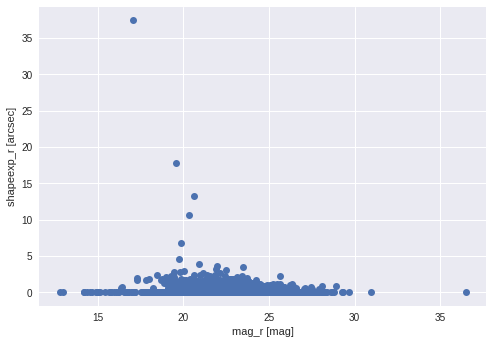

In [277]:
plt.plot(notNAN['mag_r'], notNAN['shapeexp_r'], 'o')
plt.xlabel('mag_r [mag]')
plt.ylabel('shapeexp_r [arcsec]');

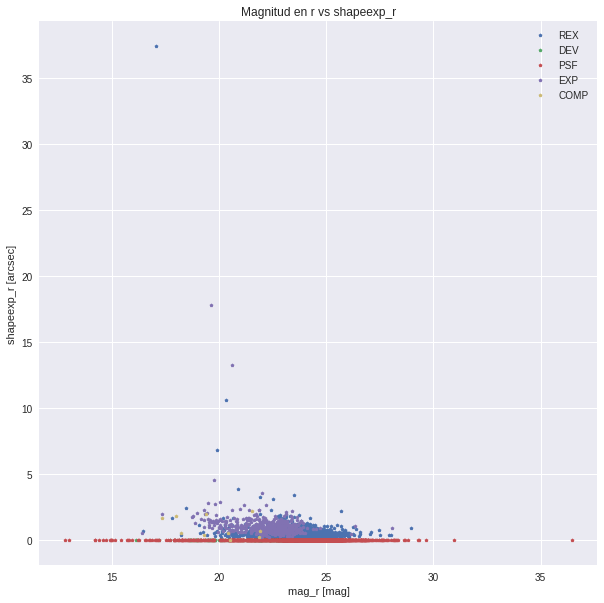

In [278]:
plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para graficar por color
    plt.plot(notNAN['mag_r'][notNAN['type'] == m], notNAN['shapeexp_r'][notNAN['type'] == m], 'p', markersize = 4,label = m)
    
plt.legend()
plt.xlabel('mag_r [mag]')
plt.ylabel('shapeexp_r [arcsec]');
plt.title('Magnitud en r vs shapeexp_r');

**Gráfica mag_r vs shapedev_r**

**shapedev_r = Half light radius of DeVacouleurs model.**

In [279]:
notNAN = file

In [280]:
notNAN = file.dropna(subset=['mag_r'])
notNAN = file.dropna(subset=['shapedev_r'])

In [281]:
notNAN['mag_r'] = notNAN['mag_r'].astype(float)
notNAN['shapedev_r'] = notNAN['shapedev_r'].astype(float)

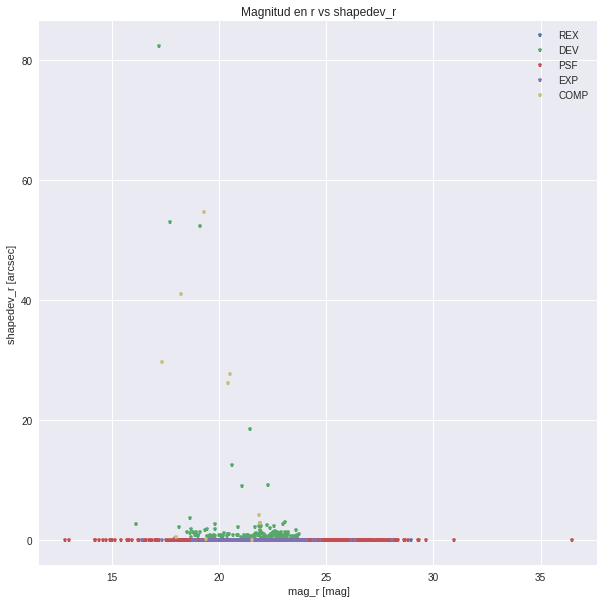

In [282]:
plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para graficar por color
    plt.plot(notNAN['mag_r'][notNAN['type'] == m], notNAN['shapedev_r'][notNAN['type'] == m], 'p', markersize = 5,label = m)
    
plt.legend()
plt.xlabel('mag_r [mag]')
plt.ylabel('shapedev_r [arcsec]');
plt.title('Magnitud en r vs shapedev_r');

Notamos que tiene una forma similar con mag_r vs shapeexp_r.  

----------------------------------

**Gráfica de mag_r vs dered_flux_r**

dered_flux_r = Dereddened R-band flux.

In [283]:
notNAN = file

In [284]:
notNAN = file.dropna(subset=['mag_r'])
notNAN = file.dropna(subset=['dered_flux_r'])

In [285]:
notNAN['mag_r'] = notNAN['mag_r'].astype(float)
notNAN['dered_flux_r'] = notNAN['dered_flux_r'].astype(float)

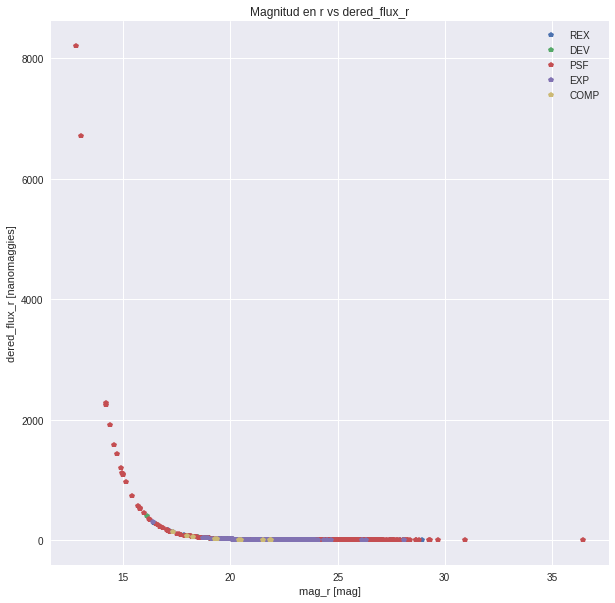

In [288]:
plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para graficar por color
    plt.plot(notNAN['mag_r'][notNAN['type'] == m], notNAN['dered_flux_r'][notNAN['type'] == m], 'p', markersize = 6,label = m)
    
plt.legend()
plt.xlabel('mag_r [mag]')
plt.ylabel('dered_flux_r [nanomaggies]');
plt.title('Magnitud en r vs dered_flux_r');

Observamos que se ve como una exponencial decayente la relación entre estas dos variables. 

¿mag_g vs dered_flux_g se verá igual?

**mag_g vs dered_flux_g**

In [293]:
notNAN = file

In [294]:
notNAN = file.dropna(subset=['mag_g'])
notNAN = file.dropna(subset=['dered_flux_g'])

In [295]:
notNAN['mag_g'] = notNAN['mag_g'].astype(float)
notNAN['dered_flux_g'] = notNAN['dered_flux_g'].astype(float)

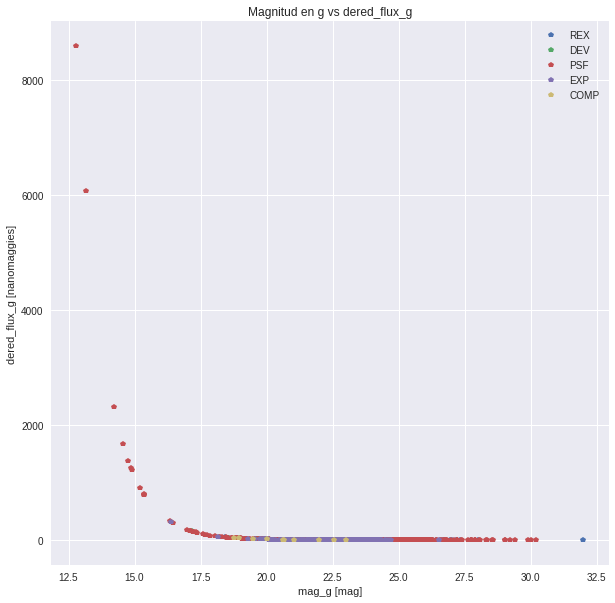

In [296]:
plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para graficar por color
    plt.plot(notNAN['mag_g'][notNAN['type'] == m], notNAN['dered_flux_g'][notNAN['type'] == m], 'p', markersize = 6,label = m)
    
plt.legend()
plt.xlabel('mag_g [mag]')
plt.ylabel('dered_flux_g [nanomaggies]');
plt.title('Magnitud en g vs dered_flux_g');

Y sí, también es una exponencial decayente. 

**Gráfica de dered_flux_r vs dered_flux_g**

(0, 10)

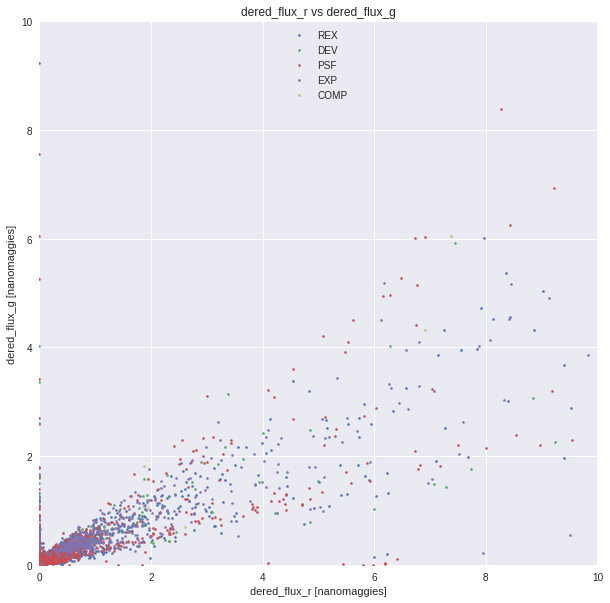

In [306]:
notNAN = file

notNAN = file.dropna(subset=['dered_flux_r'])
notNAN = file.dropna(subset=['dered_flux_g'])

notNAN['dered_flux_r'] = notNAN['dered_flux_r'].astype(float)
notNAN['dered_flux_g'] = notNAN['dered_flux_g'].astype(float)

plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para graficar por color
    plt.plot(notNAN['dered_flux_r'][notNAN['type'] == m], notNAN['dered_flux_g'][notNAN['type'] == m], 'p', markersize = 3,label = m)
    
plt.legend()
plt.xlabel('dered_flux_r [nanomaggies]')
plt.ylabel('dered_flux_g [nanomaggies]');
plt.title('dered_flux_r vs dered_flux_g');
plt.xlim(0,10)
plt.ylim(0,10)

------------------------------

**Gráfica de mag_g vs psfsize_g**

psfsize_g: Wighted average PSF FWHM in the g band. 

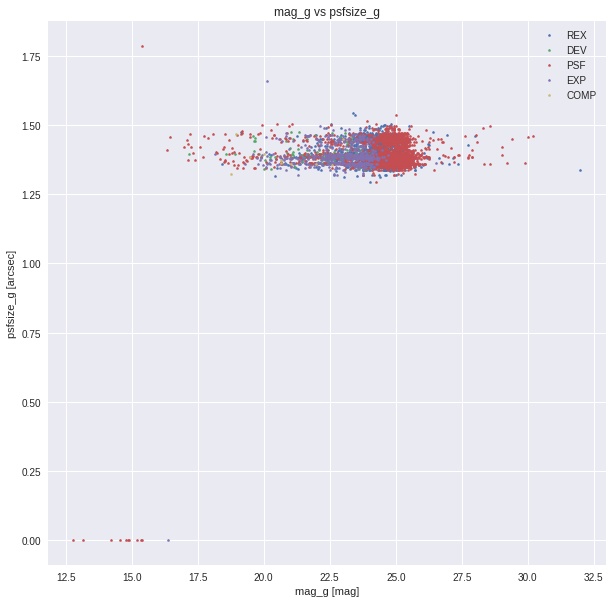

In [309]:
notNAN = file

notNAN = file.dropna(subset=['mag_g'])
notNAN = file.dropna(subset=['psfsize_g'])

notNAN['mag_g'] = notNAN['mag_g'].astype(float)
notNAN['psfsize_g'] = notNAN['psfsize_g'].astype(float)

plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para graficar por color
    plt.plot(notNAN['mag_g'][notNAN['type'] == m], notNAN['psfsize_g'][notNAN['type'] == m], 'p', markersize = 3,label = m)
    
plt.legend()
plt.xlabel('mag_g [mag]')
plt.ylabel('psfsize_g [arcsec]');
plt.title('mag_g vs psfsize_g');

**mag_g vs flux_g**

flux_g: model flux in g

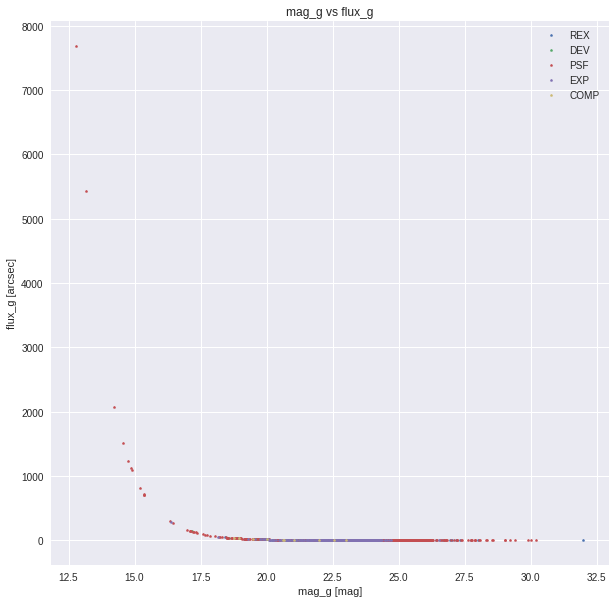

In [310]:
notNAN = file

notNAN = file.dropna(subset=['mag_g'])
notNAN = file.dropna(subset=['flux_g'])

notNAN['mag_g'] = notNAN['mag_g'].astype(float)
notNAN['flux_g'] = notNAN['flux_g'].astype(float)

plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para graficar por color
    plt.plot(notNAN['mag_g'][notNAN['type'] == m], notNAN['flux_g'][notNAN['type'] == m], 'p', markersize = 3,label = m)
    
plt.legend()
plt.xlabel('mag_g [mag]')
plt.ylabel('flux_g [arcsec]');
plt.title('mag_g vs flux_g');

**Flux_r vs Flux_g**

(0, 500)

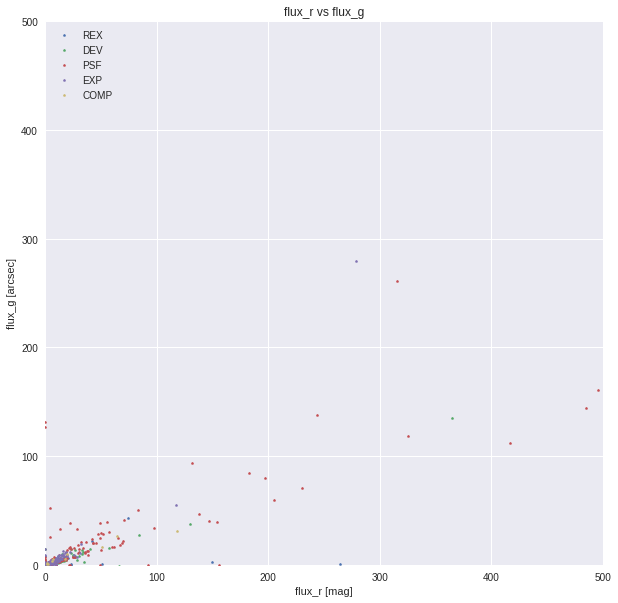

In [312]:
notNAN = file

notNAN = file.dropna(subset=['flux_r'])
notNAN = file.dropna(subset=['flux_g'])

notNAN['flux_r'] = notNAN['flux_r'].astype(float)
notNAN['flux_g'] = notNAN['flux_g'].astype(float)

plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para graficar por color
    plt.plot(notNAN['flux_r'][notNAN['type'] == m], notNAN['flux_g'][notNAN['type'] == m], 'p', markersize = 3,label = m)
    
plt.legend()
plt.xlabel('flux_r [mag]')
plt.ylabel('flux_g [arcsec]');
plt.title('flux_r vs flux_g');
plt.ylim(0,500)
plt.xlim(0,500)

-------------------------------

**Finalmente, hacemos gráfica de glon vs glat**

**glon: Galactic Longitude. glat: Galactic Latitude.**

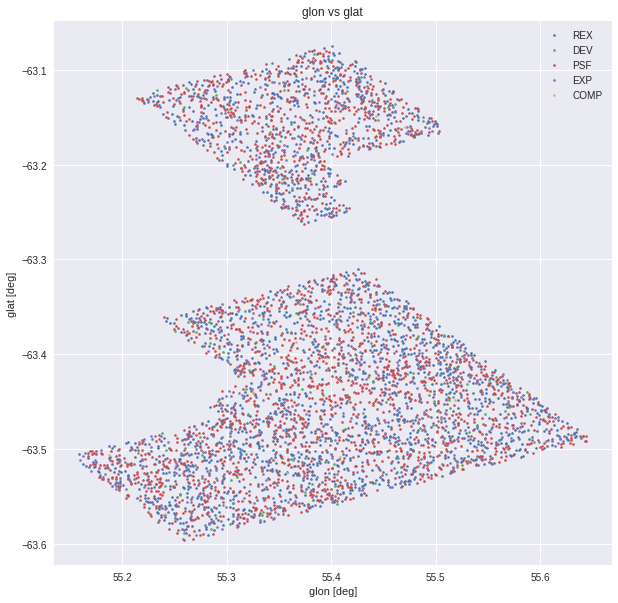

In [316]:
notNAN = file

notNAN = file.dropna(subset=['glon'])
notNAN = file.dropna(subset=['glat'])

notNAN['glon'] = notNAN['glon'].astype(float)
notNAN['glat'] = notNAN['glat'].astype(float)

plt.figure(figsize = (10,10))

for m in tipos: # Ciclo para graficar por color
    plt.plot(notNAN['glon'][notNAN['type'] == m], notNAN['glat'][notNAN['type'] == m], 'p', markersize = 3,label = m)
    
plt.legend()
plt.xlabel('glon [deg]')
plt.ylabel('glat [deg]');
plt.title('glon vs glat');

Es muy parecida a 'dec' vs 'ra', sólo que un poco volteada o girada. 